In [ ]:
!cp '/content/drive/MyDrive/HACKER EARTH/7342422066d511eb.zip'  .

In [ ]:
!unzip -q 7342422066d511eb.zip

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt


In [ ]:

submi=pd.read_csv('/content/dataset/sample_submission.csv')
submi.head()

,Customer Id,Cost
0,fffe3900350033003300,283.29
1,fffe3800330031003900,159.96
2,fffe3600370035003100,154.29
3,fffe350031003300,161.16
4,fffe3900320038003400,159.23


In [ ]:
train=pd.read_csv('/content/dataset/train.csv')
train.head()


,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [ ]:
train.shape

(6500, 20)

In [ ]:
test=pd.read_csv('/content/dataset/test.csv')
test.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location
0,fffe3400310033003300,James Miller,0.35,53.0,18.0,871.0,Wood,5.98,19.11,Yes,Yes,No,Airways,No,Working Class,No,07/03/17,07/06/17,"Santoshaven, IA 63481"
1,fffe3600350035003400,Karen Vetrano,0.67,7.0,4.0,108.0,Clay,6.92,13.96,No,No,No,Roadways,Yes,Working Class,No,05/02/16,05/02/16,"Ericksonton, OH 98253"
2,fffe3700360030003500,Roseanne Gaona,0.61,6.0,5.0,97.0,Aluminium,4.23,13.62,Yes,No,No,Airways,No,Working Class,No,01/04/18,01/06/18,APO AP 83453
3,fffe350038003600,Todd Almanza,0.14,15.0,8.0,757.0,Clay,6.28,23.79,No,Yes,No,Roadways,Yes,Wealthy,No,09/14/17,09/17/17,"Antonioborough, AL 54778"
4,fffe3500390032003500,Francis Rivero,0.63,10.0,4.0,1673.0,Marble,4.39,17.83,No,Yes,Yes,Roadways,No,Working Class,Yes,12/03/17,12/02/17,"Lake Frances, LA 03040"


In [ ]:
test.shape

(3500, 19)

**Data understanding**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Id            6500 non-null   object 
 1   Artist Name            6500 non-null   object 
 2   Artist Reputation      5750 non-null   float64
 3   Height                 6125 non-null   float64
 4   Width                  5916 non-null   float64
 5   Weight                 5913 non-null   float64
 6   Material               5736 non-null   object 
 7   Price Of Sculpture     6500 non-null   float64
 8   Base Shipping Price    6500 non-null   float64
 9   International          6500 non-null   object 
 10  Express Shipment       6500 non-null   object 
 11  Installation Included  6500 non-null   object 
 12  Transport              5108 non-null   object 
 13  Fragile                6500 non-null   object 
 14  Customer Information   6500 non-null   object 
 15  Remo

In [ ]:
train.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


In [ ]:
train.isna().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [ ]:
# set target feature
targetFeature='Cost'

In [ ]:
train.drop(['Customer Id','Artist Name'], inplace=True,axis=1)

In [ ]:
test.drop(['Artist Name'],inplace=True, axis=1)

In [ ]:
train.shape,test.shape

((6500, 18), (3500, 18))

**2.EDA**

In [ ]:
# select numerical and categorical features
def divideFeatures(df):
    numerical_features = df.select_dtypes(include=[np.number])
    categorical_features = df.select_dtypes(include=[np.object])
    return numerical_features, categorical_features

In [ ]:
cont_features, cat_features = divideFeatures(train)
cat_features

,Material,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location
0,Brass,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777"
1,Brass,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072"
2,Clay,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241"
3,Aluminium,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375"
4,Aluminium,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793"
...,...,...,...,...,...,...,...,...,...,...,...
6495,Brass,Yes,Yes,No,Airways,No,Wealthy,Yes,03/28/18,03/25/18,"New Robert, VT 85335"
6496,NaN,No,No,No,Roadways,No,Working Class,No,08/29/15,08/27/15,"New Joshua, VA 35766"
6497,Clay,Yes,No,No,NaN,Yes,Wealthy,No,04/10/19,04/09/19,"Lake Kelly, MA 80823"
6498,Stone,No,Yes,No,Roadways,No,Working Class,Yes,03/10/19,03/12/19,"Hintonberg, UT 35006"


**univariate Analysis**

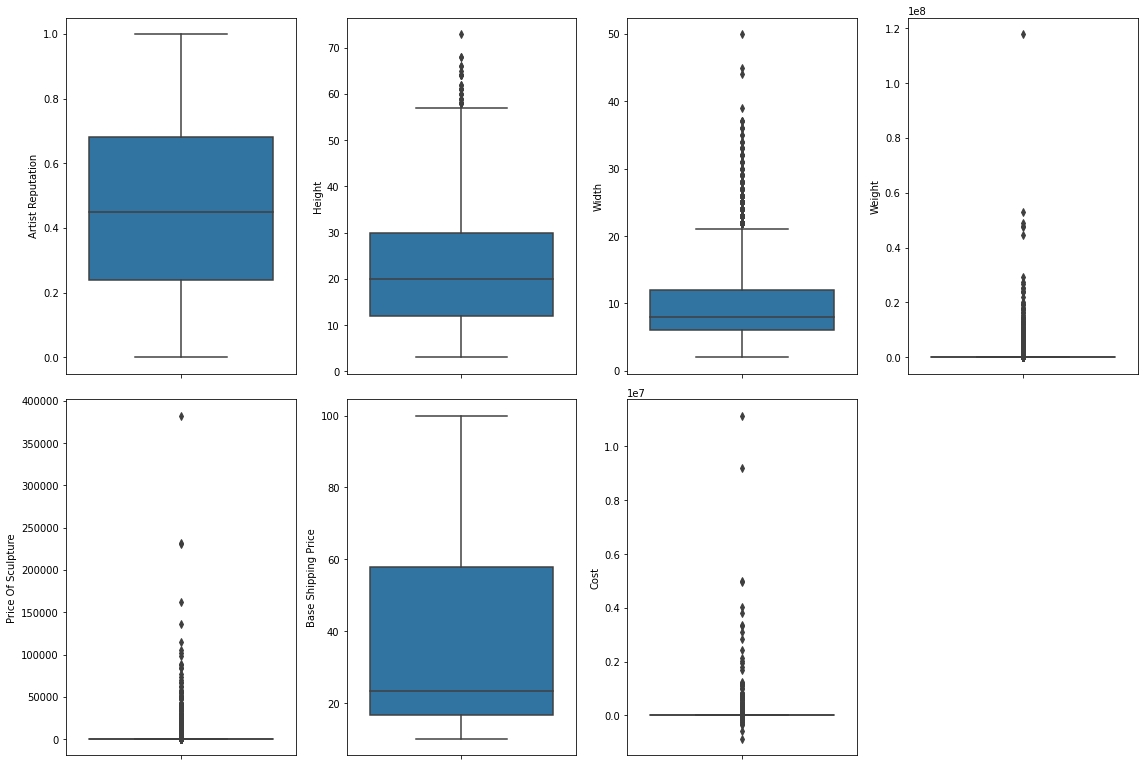

In [ ]:
# boxplots of numerical features for outlier detection
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(16,16))
for i in range(len(cont_features.columns)):
    fig.add_subplot(3, 4, i+1)
    sns.boxplot(y=cont_features.iloc[:,i])
plt.tight_layout()
plt.show()

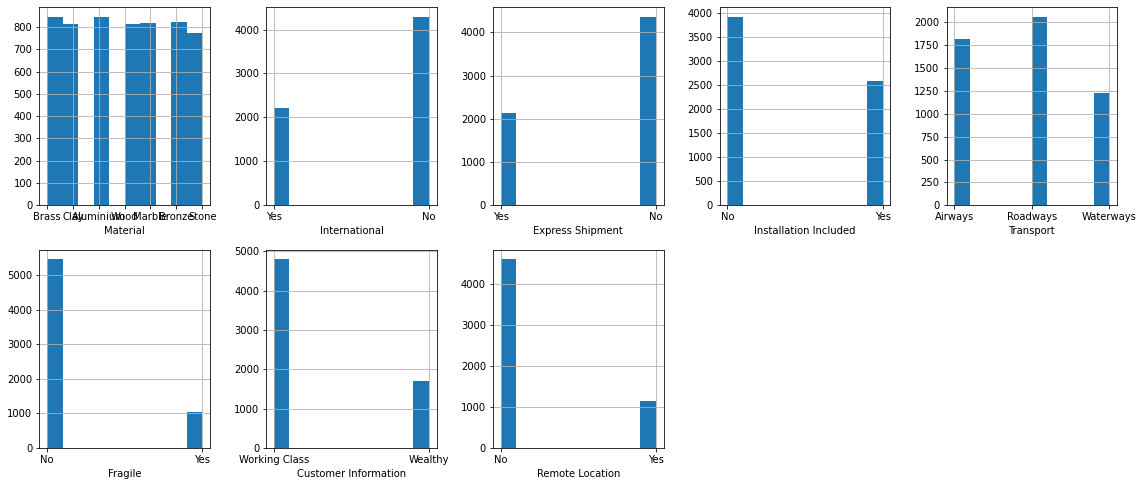

In [ ]:
# distplots for categorical data

fig = plt.figure(figsize=(16,30))
for i in range(len(cat_features.columns[:-3])):
    fig.add_subplot(9, 5, i+1)
    cat_features.iloc[:,i].hist()
    plt.xlabel(cat_features.columns[i])
plt.tight_layout()
plt.show()

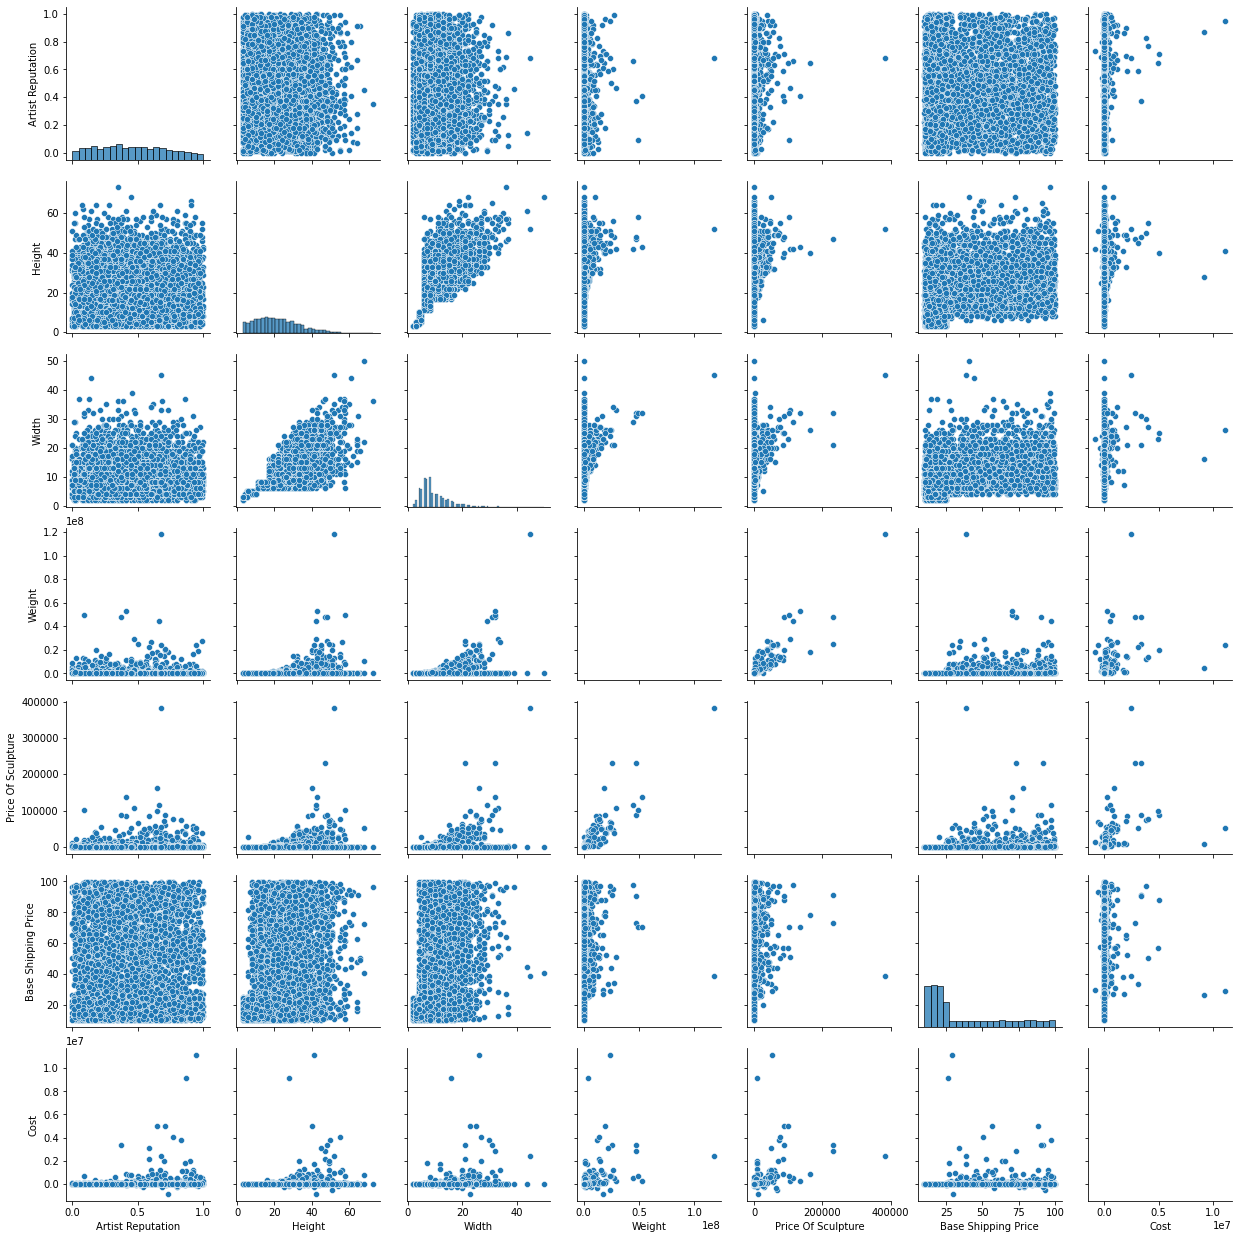

In [ ]:
sns.pairplot(train)
plt.show()

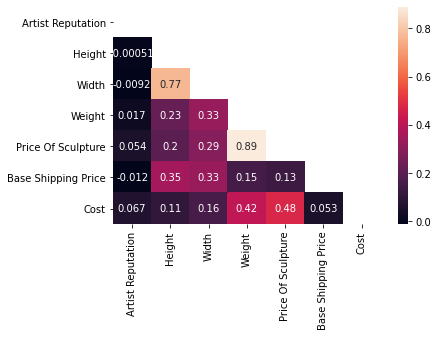

In [ ]:
# correlation heatmap for all features
corr = train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True #Return the indices for the upper-triangle of arr.
sns.heatmap(corr, mask = mask, annot=True)
plt.show()

**3. Data Prepration**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


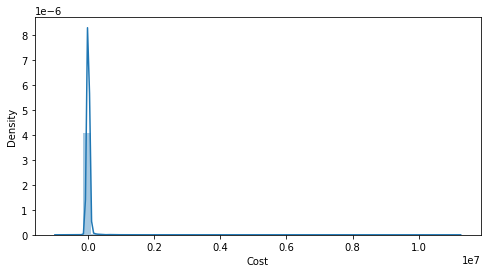

In [ ]:
# see plot sample skewed feature for target variable
plt.figure(figsize=(8,4))
sns.distplot(train[targetFeature])
plt.show()

**Remove missing values**

$1$.

In [ ]:
missing_v = train.isna().sum().sort_values(ascending=False)

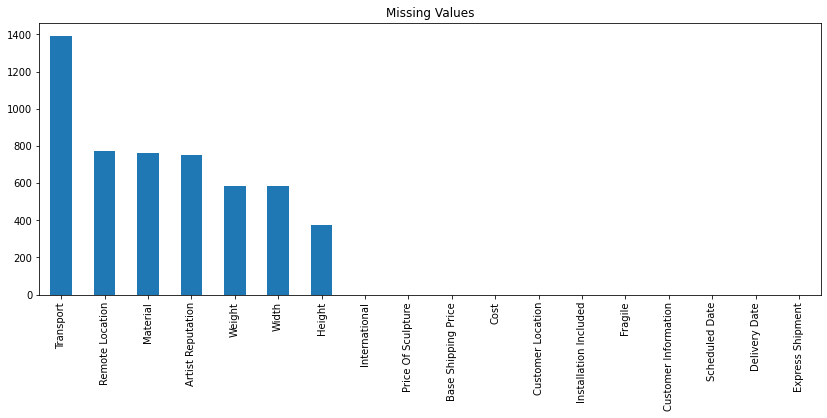

In [ ]:
missing_v.plot(kind='bar',figsize=(14,5))
plt.title('Missing Values')
plt.show()

**$2$.**

In [ ]:
 missing_v = train.isna().sum().sort_values(ascending=False)
 missing_v = missing_v[missing_v != 0]

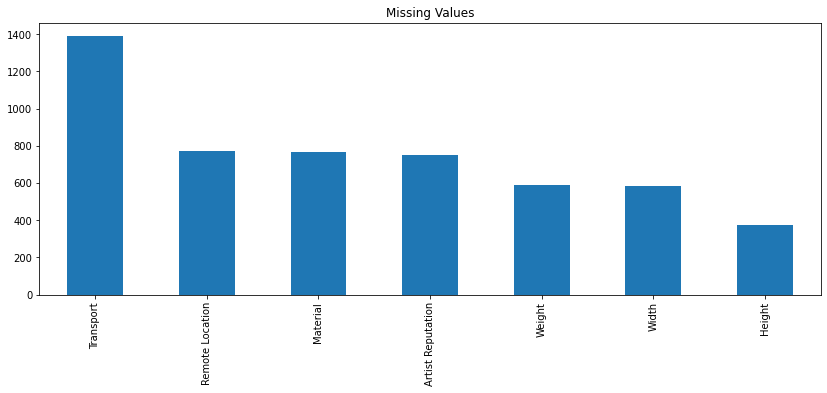

In [ ]:
missing_v.plot(kind='bar',figsize=(14,5))
plt.title('Missing Values')
plt.show()

**$3$.**

In [ ]:
def calc_missing(df):
    missing = df.isna().sum().sort_values(ascending=False)
    missing = missing[missing != 0]
    #missing_perc = missing/df.shape[0]*100
    return missing

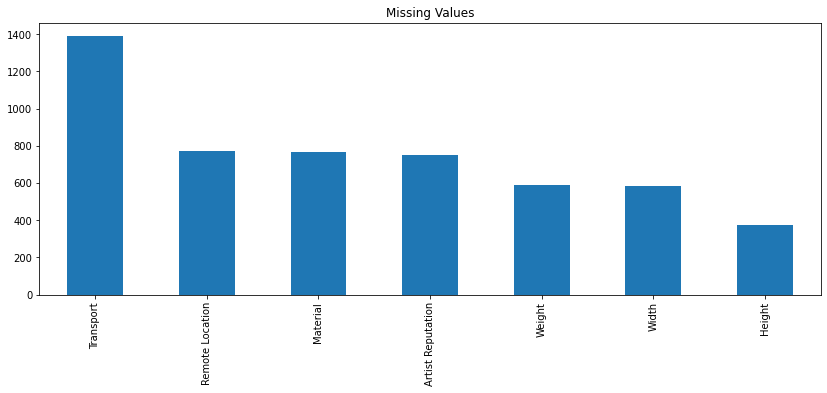

In [ ]:
if train.isna().any().sum()>0:
    missing= calc_missing(train)
    missing.plot(kind='bar',figsize=(14,5))
    plt.title('Missing Values')
    plt.show()
else:
    print("No Missing Values")

**4.**

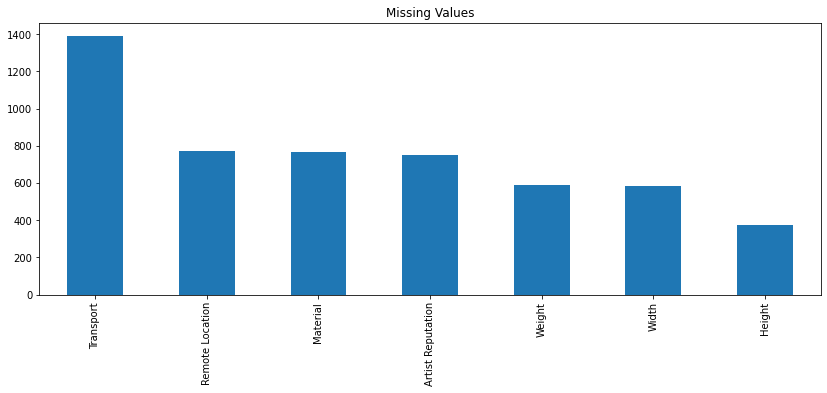

In [ ]:
def calc_missing(df):
    missing = train.isna().sum().sort_values(ascending=False)
    missing = missing[missing != 0]
    missing_perc = missing/train.shape[0]*100
    return missing, missing_perc

if train.isna().any().sum()>0:
    missing, missing_perc = calc_missing(train)
    missing.plot(kind='bar',figsize=(14,5))
    plt.title('Missing Values')
    plt.show()
else:
    print("No Missing Values")

**defining function  for filling null values by mean , median**

In [ ]:
def fillNanValues(df, col, value):
    df[col].fillna(value, inplace=True)

In [ ]:
fillNanValues(train, 'Artist Reputation', train['Artist Reputation'].median())
fillNanValues(test, 'Artist Reputation', test['Artist Reputation'].median())
print(train['Artist Reputation'].isna().any())#any returns boolean values
print(test['Artist Reputation'].isna().any())

False
False


In [ ]:
fillNanValues(train, 'Height', train['Height'].median())
print(train['Height'].isna().sum())
fillNanValues(test, 'Height', test['Height'].median())
print(test['Height'].isna().sum()) # sum gives numerival assurance

0
0


In [ ]:
fillNanValues(train, 'Width', train['Width'].median())
print(train['Width'].isna().sum())
fillNanValues(test, 'Width', test['Width'].median())
print(test['Width'].isna().sum())

0
0


In [ ]:
fillNanValues(train, 'Weight', train['Weight'].median())
print(train['Weight'].isna().sum())
fillNanValues(test, 'Weight', test['Weight'].median())
print(test['Weight'].isna().sum())

0
0


In [ ]:
fillNanValues(train, 'Material', train['Material'].mode()[0])
print(train['Material'].isna().sum())
fillNanValues(test, 'Material', test['Material'].mode()[0])
print(test['Material'].isna().sum())

0
0


**Categorical variables using mode function**

In [ ]:
fillNanValues(train, 'Material', train['Material'].mode()[0])
print(train['Material'].isna().sum())
fillNanValues(test, 'Material', test['Material'].mode()[0])
print(test['Material'].isna().sum())

0
0


In [ ]:
fillNanValues(train, 'Transport', train['Transport'].mode()[0])
print(train['Transport'].isna().sum())
fillNanValues(test, 'Transport', test['Transport'].mode()[0])
print(test['Transport'].isna().sum())

0
0


In [ ]:
fillNanValues(train, 'Remote Location', train['Remote Location'].mode()[0])
print(train['Remote Location'].isna().sum())
fillNanValues(test, 'Remote Location', test['Remote Location'].mode()[0])
print(test['Remote Location'].isna().sum())

0
0


In [ ]:
check_null_in_train =train.isnull().sum()
print(check_null_in_train)

Artist Reputation                     0
Height                                0
Width                                 0
Weight                                0
Material                              0
Price Of Sculpture                    0
Base Shipping Price                   0
International                         0
Express Shipment                      0
Installation Included                 0
Fragile                               0
Remote Location                       0
Cost                                  0
State                                 0
schedulediff                          0
dday                                  0
dmonth                                0
dyear                                 0
ddayof week                           0
Customer Information_Wealthy          0
Customer Information_Working Class    0
Transport_Airways                     0
Transport_Roadways                    0
Transport_Waterways                   0
dtype: int64


**Another way**

In [ ]:
check_null_in_train = pd.isnull(train).sum()
print(check_null_in_train)

Artist Reputation        0
Height                   0
Width                    0
Weight                   0
Material                 0
Price Of Sculpture       0
Base Shipping Price      0
International            0
Express Shipment         0
Installation Included    0
Transport                0
Fragile                  0
Customer Information     0
Remote Location          0
Scheduled Date           0
Delivery Date            0
Customer Location        0
Cost                     0
dtype: int64


In [ ]:
null_in_train = pd.isnull(test).sum()
print(null_in_train)

Customer Id              0
Artist Reputation        0
Height                   0
Width                    0
Weight                   0
Material                 0
Price Of Sculpture       0
Base Shipping Price      0
International            0
Express Shipment         0
Installation Included    0
Transport                0
Fragile                  0
Customer Information     0
Remote Location          0
Scheduled Date           0
Delivery Date            0
Customer Location        0
dtype: int64


In [ ]:
train.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,0.12,9.0,8.0,3102.0,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


**picking out the state from customer location**

In [ ]:
train['State'] = train['Customer Location'].map(lambda x:x.split()[-2])

In [ ]:
train.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost,State
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29,OH
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96,WY
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29,WA
3,0.12,9.0,8.0,3102.0,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16,KY
4,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23,PA


In [ ]:
train.drop(columns=['Customer Location'], inplace=True)

In [ ]:
train.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Cost,State
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,-283.29,OH
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,-159.96,WY
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,-154.29,WA
3,0.12,9.0,8.0,3102.0,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,Yes,05/24/15,05/20/15,-161.16,KY
4,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,-159.23,PA


In [ ]:
test['State'] = test['Customer Location'].map(lambda x:x.split()[-2])

In [ ]:
test.head()

,Customer Id,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,State
0,fffe3400310033003300,0.35,53.0,18.0,871.0,Wood,5.98,19.11,Yes,Yes,No,Airways,No,Working Class,No,07/03/17,07/06/17,"Santoshaven, IA 63481",IA
1,fffe3600350035003400,0.67,7.0,4.0,108.0,Clay,6.92,13.96,No,No,No,Roadways,Yes,Working Class,No,05/02/16,05/02/16,"Ericksonton, OH 98253",OH
2,fffe3700360030003500,0.61,6.0,5.0,97.0,Aluminium,4.23,13.62,Yes,No,No,Airways,No,Working Class,No,01/04/18,01/06/18,APO AP 83453,AP
3,fffe350038003600,0.14,15.0,8.0,757.0,Clay,6.28,23.79,No,Yes,No,Roadways,Yes,Wealthy,No,09/14/17,09/17/17,"Antonioborough, AL 54778",AL
4,fffe3500390032003500,0.63,10.0,4.0,1673.0,Marble,4.39,17.83,No,Yes,Yes,Roadways,No,Working Class,Yes,12/03/17,12/02/17,"Lake Frances, LA 03040",LA


In [ ]:
test.drop(columns=['Customer Location'],inplace=True)

In [ ]:
test.head()

,Customer Id,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,State
0,fffe3400310033003300,0.35,53.0,18.0,871.0,Wood,5.98,19.11,Yes,Yes,No,Airways,No,Working Class,No,07/03/17,07/06/17,IA
1,fffe3600350035003400,0.67,7.0,4.0,108.0,Clay,6.92,13.96,No,No,No,Roadways,Yes,Working Class,No,05/02/16,05/02/16,OH
2,fffe3700360030003500,0.61,6.0,5.0,97.0,Aluminium,4.23,13.62,Yes,No,No,Airways,No,Working Class,No,01/04/18,01/06/18,AP
3,fffe350038003600,0.14,15.0,8.0,757.0,Clay,6.28,23.79,No,Yes,No,Roadways,Yes,Wealthy,No,09/14/17,09/17/17,AL
4,fffe3500390032003500,0.63,10.0,4.0,1673.0,Marble,4.39,17.83,No,Yes,Yes,Roadways,No,Working Class,Yes,12/03/17,12/02/17,LA


In [ ]:
train['Scheduled Date']=pd.to_datetime(train['Scheduled Date'])
train['Delivery Date'] = pd.to_datetime(train['Delivery Date'])


In [ ]:
train.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Cost,State
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,2015-06-07,2015-06-03,-283.29,OH
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,2017-03-06,2017-03-05,-159.96,WY
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,-154.29,WA
3,0.12,9.0,8.0,3102.0,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,Yes,2015-05-24,2015-05-20,-161.16,KY
4,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,2016-12-18,2016-12-14,-159.23,PA


In [ ]:
train['schedulediff'] = (train['Delivery Date']-train['Scheduled Date']).map(lambda x:str(x).split()[0])

In [ ]:
train.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Cost,State,schedulediff
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,2015-06-07,2015-06-03,-283.29,OH,-4
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,2017-03-06,2017-03-05,-159.96,WY,-1
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,-154.29,WA,-1
3,0.12,9.0,8.0,3102.0,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,Yes,2015-05-24,2015-05-20,-161.16,KY,-4
4,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,2016-12-18,2016-12-14,-159.23,PA,-4


In [ ]:
test['Scheduled Date']=pd.to_datetime(test['Scheduled Date'])
test['Delivery Date'] = pd.to_datetime(test['Delivery Date'])
test['schedulediff'] = (test['Delivery Date']-test['Scheduled Date']).map(lambda x:str(x).split()[0])

In [ ]:
train['dday'] = train['Delivery Date'].dt.day
train['dmonth'] = train['Delivery Date'].dt.month
train['dyear'] = train['Delivery Date'].dt.year
train['ddayof week'] = train['Delivery Date'].dt.dayofweek

In [ ]:
train.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Cost,State,schedulediff,dday,dmonth,dyear,ddayof week
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,2015-06-07,2015-06-03,-283.29,OH,-4,3,6,2015,2
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,2017-03-06,2017-03-05,-159.96,WY,-1,5,3,2017,6
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,-154.29,WA,-1,8,3,2015,6
3,0.12,9.0,8.0,3102.0,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,Yes,2015-05-24,2015-05-20,-161.16,KY,-4,20,5,2015,2
4,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,2016-12-18,2016-12-14,-159.23,PA,-4,14,12,2016,2


In [ ]:
test['dday'] = test['Delivery Date'].dt.day
test['dmonth'] = test['Delivery Date'].dt.month
test['dyear'] = test['Delivery Date'].dt.year
test['ddayof week'] = test['Delivery Date'].dt.dayofweek

In [ ]:
train.drop(columns=['Scheduled Date', 'Delivery Date'], inplace = True, axis=1)
test.drop(columns=['Scheduled Date', 'Delivery Date'], inplace = True, axis=1)

In [ ]:
continuous_data, categorical_data = divideFeatures(train)

In [ ]:
categorical_data[:5]

,Material,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,State,schedulediff
0,Brass,Yes,Yes,No,Airways,No,Working Class,No,OH,-4
1,Brass,No,No,No,Roadways,No,Working Class,No,WY,-1
2,Clay,No,No,No,Roadways,Yes,Working Class,Yes,WA,-1
3,Aluminium,No,No,No,Roadways,No,Wealthy,Yes,KY,-4
4,Aluminium,Yes,Yes,Yes,Airways,No,Working Class,No,PA,-4


In [ ]:
train['schedulediff']=pd.to_numeric(train['schedulediff'])
test['schedulediff']=pd.to_numeric(test['schedulediff'])

In [ ]:
continuous_data, categorical_data = divideFeatures(train)
categorical_data[:5]

,Material,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,State
0,Brass,Yes,Yes,No,Airways,No,Working Class,No,OH
1,Brass,No,No,No,Roadways,No,Working Class,No,WY
2,Clay,No,No,No,Roadways,Yes,Working Class,Yes,WA
3,Aluminium,No,No,No,Roadways,No,Wealthy,Yes,KY
4,Aluminium,Yes,Yes,Yes,Airways,No,Working Class,No,PA


In [ ]:
categorical_data.nunique()

Material                  7
International             2
Express Shipment          2
Installation Included     2
Transport                 3
Fragile                   2
Customer Information      2
Remote Location           2
State                    54
dtype: int64

In [ ]:
for col in categorical_data:
    print(f'{col} : {categorical_data[col].unique()}')

Material : ['Brass' 'Clay' 'Aluminium' 'Wood' 'Marble' 'Bronze' 'Stone']
International : ['Yes' 'No']
Express Shipment : ['Yes' 'No']
Installation Included : ['No' 'Yes']
Transport : ['Airways' 'Roadways' 'Waterways']
Fragile : ['No' 'Yes']
Customer Information : ['Working Class' 'Wealthy']
Remote Location : ['No' 'Yes']
State : ['OH' 'WY' 'WA' 'KY' 'PA' 'AL' 'WV' 'CA' 'ND' 'GA' 'DC' 'TX' 'CO' 'AE'
 'OR' 'MI' 'NM' 'AR' 'AP' 'VT' 'IA' 'MN' 'NH' 'SC' 'AA' 'OK' 'HI' 'RI'
 'LA' 'DE' 'ID' 'CT' 'MS' 'FL' 'VA' 'MA' 'KS' 'ME' 'NC' 'NV' 'MD' 'SD'
 'WI' 'MT' 'IL' 'AZ' 'AK' 'NY' 'NJ' 'TN' 'NE' 'MO' 'IN' 'UT']


In [ ]:
#binary coding
yes_no_columns = ['International', 'Express Shipment', 'Installation Included', 'Fragile', 'Remote Location']

for column in yes_no_columns:
    train[column].replace({'Yes':1, 'No':0}, inplace=True)

In [ ]:
train.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Cost,State,schedulediff,dday,dmonth,dyear,ddayof week
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,1,1,0,Airways,0,Working Class,0,-283.29,OH,-4,3,6,2015,2
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,0,0,0,Roadways,0,Working Class,0,-159.96,WY,-1,5,3,2017,6
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,0,0,0,Roadways,1,Working Class,1,-154.29,WA,-1,8,3,2015,6
3,0.12,9.0,8.0,3102.0,Aluminium,5.81,16.31,0,0,0,Roadways,0,Wealthy,1,-161.16,KY,-4,20,5,2015,2
4,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,1,1,1,Airways,0,Working Class,0,-159.23,PA,-4,14,12,2016,2


In [ ]:
#one Hot encoding for the columns Customer Information, Transport
train = pd.get_dummies(data=train, columns = ['Customer Information', 'Transport'])

In [ ]:
train.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Fragile,Remote Location,Cost,State,schedulediff,dday,dmonth,dyear,ddayof week,Customer Information_Wealthy,Customer Information_Working Class,Transport_Airways,Transport_Roadways,Transport_Waterways
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,1,1,0,0,0,-283.29,OH,-4,3,6,2015,2,0,1,1,0,0
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,0,0,0,0,0,-159.96,WY,-1,5,3,2017,6,0,1,0,1,0
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,0,0,0,1,1,-154.29,WA,-1,8,3,2015,6,0,1,0,1,0
3,0.12,9.0,8.0,3102.0,Aluminium,5.81,16.31,0,0,0,0,1,-161.16,KY,-4,20,5,2015,2,1,0,0,1,0
4,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,1,1,1,0,0,-159.23,PA,-4,14,12,2016,2,0,1,1,0,0


Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
label_columns=['Material', 'State']

for label_column in label_columns:
    train[label_column] = le.fit_transform(train[label_column])

In [ ]:
train[:5]

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Fragile,Remote Location,Cost,State,schedulediff,dday,dmonth,dyear,ddayof week,Customer Information_Wealthy,Customer Information_Working Class,Transport_Airways,Transport_Roadways,Transport_Waterways
0,0.26,17.0,6.0,4128.0,1,13.91,16.27,1,1,0,0,0,-283.29,38,-4,3,6,2015,2,0,1,1,0,0
1,0.28,3.0,3.0,61.0,1,6.83,15.00,0,0,0,0,0,-159.96,53,-1,5,3,2017,6,0,1,0,1,0
2,0.07,8.0,5.0,237.0,3,4.96,21.18,0,0,0,1,1,-154.29,50,-1,8,3,2015,6,0,1,0,1,0
3,0.12,9.0,8.0,3102.0,0,5.81,16.31,0,0,0,0,1,-161.16,20,-4,20,5,2015,2,1,0,0,1,0
4,0.15,17.0,6.0,324.0,0,3.18,11.94,1,1,1,0,0,-159.23,41,-4,14,12,2016,2,0,1,1,0,0


In [ ]:
yes_no_columns_test = ['International', 'Express Shipment', 'Installation Included', 'Fragile', 'Remote Location']

for column in yes_no_columns_test:
    test[column].replace({'Yes':1, 'No':0}, inplace=True)

In [ ]:
test.head()

,Customer Id,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,State,schedulediff,dday,dmonth,dyear,ddayof week
0,fffe3400310033003300,0.35,53.0,18.0,871.0,Wood,5.98,19.11,1,1,0,Airways,0,Working Class,0,IA,3,6,7,2017,3
1,fffe3600350035003400,0.67,7.0,4.0,108.0,Clay,6.92,13.96,0,0,0,Roadways,1,Working Class,0,OH,0,2,5,2016,0
2,fffe3700360030003500,0.61,6.0,5.0,97.0,Aluminium,4.23,13.62,1,0,0,Airways,0,Working Class,0,AP,2,6,1,2018,5
3,fffe350038003600,0.14,15.0,8.0,757.0,Clay,6.28,23.79,0,1,0,Roadways,1,Wealthy,0,AL,3,17,9,2017,6
4,fffe3500390032003500,0.63,10.0,4.0,1673.0,Marble,4.39,17.83,0,1,1,Roadways,0,Working Class,1,LA,-1,2,12,2017,5


In [ ]:
test=pd.get_dummies(data=test,columns=['Customer Information', 'Transport'])


In [ ]:
test_le=['Material', 'State']
for test_le in test_le:
  test[test_le]=le.fit_transform(test[test_le])

In [ ]:
test.head()

,Customer Id,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Fragile,Remote Location,State,schedulediff,dday,dmonth,dyear,ddayof week,Customer Information_Wealthy,Customer Information_Working Class,Transport_Airways,Transport_Roadways,Transport_Waterways
0,fffe3400310033003300,0.35,53.0,18.0,871.0,6,5.98,19.11,1,1,0,0,0,15,3,6,7,2017,3,0,1,1,0,0
1,fffe3600350035003400,0.67,7.0,4.0,108.0,3,6.92,13.96,0,0,0,1,0,38,0,2,5,2016,0,0,1,0,1,0
2,fffe3700360030003500,0.61,6.0,5.0,97.0,0,4.23,13.62,1,0,0,0,0,4,2,6,1,2018,5,0,1,1,0,0
3,fffe350038003600,0.14,15.0,8.0,757.0,3,6.28,23.79,0,1,0,1,0,3,3,17,9,2017,6,1,0,0,1,0
4,fffe3500390032003500,0.63,10.0,4.0,1673.0,4,4.39,17.83,0,1,1,0,1,21,-1,2,12,2017,5,0,1,0,1,0


In [ ]:
train_shuffle = train.sample(frac=1, random_state=12).reset_index(drop=True)

In [ ]:
train_shuffle.dtypes

Artist Reputation                     float64
Height                                float64
Width                                 float64
Weight                                float64
Material                                int64
Price Of Sculpture                    float64
Base Shipping Price                   float64
International                           int64
Express Shipment                        int64
Installation Included                   int64
Fragile                                 int64
Remote Location                         int64
Cost                                  float64
State                                   int64
schedulediff                            int64
dday                                    int64
dmonth                                  int64
dyear                                   int64
ddayof week                             int64
Customer Information_Wealthy            uint8
Customer Information_Working Class      uint8
Transport_Airways                 

In [ ]:
train_shuffle.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Fragile,Remote Location,Cost,State,schedulediff,dday,dmonth,dyear,ddayof week,Customer Information_Wealthy,Customer Information_Working Class,Transport_Airways,Transport_Roadways,Transport_Waterways
0,0.64,6.0,5.0,148.0,0,4.29,12.71,0,0,1,0,0,191.09,0,-1,24,12,2017,6,0,1,0,1,0
1,0.51,12.0,7.0,21370.0,4,62.10,26.13,0,0,1,0,0,896.85,24,-2,10,1,2017,1,0,1,0,0,1
2,0.61,25.0,8.0,3102.0,2,50.77,59.81,1,0,0,0,1,1250.28,34,1,7,12,2018,4,0,1,0,1,0
3,0.49,10.0,5.0,24576.0,5,114.75,46.45,0,0,1,0,1,708.30,17,4,25,3,2017,5,1,0,0,1,0
4,0.81,20.0,9.0,7079.0,2,40.07,74.07,1,0,0,0,0,2299.57,49,1,18,10,2018,3,0,1,0,1,0


In [ ]:
y = train_shuffle.pop(targetFeature)

In [ ]:
y

0        191.09
1        896.85
2       1250.28
3        708.30
4       2299.57
         ...   
6495    4132.30
6496    2823.89
6497     254.56
6498     143.10
6499     918.57
Name: Cost, Length: 6500, dtype: float64

In [ ]:
y.min()

-880172.65

In [ ]:
#to remove negative values
y_train=np.log1p(abs(y))

In [ ]:
y_train.min()

4.466712392840524

**4.Data Modelling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(train_shuffle, y, test_size=0.8, random_state=12)

X_train = pd.DataFrame(scaler.fit_transform(train_shuffle), columns=train_shuffle.columns)

In [ ]:
X_train.shape

(6500, 23)

In [ ]:
X_train[:5]

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Fragile,Remote Location,State,schedulediff,dday,dmonth,dyear,ddayof week,Customer Information_Wealthy,Customer Information_Working Class,Transport_Airways,Transport_Roadways,Transport_Waterways
0,0.718112,-1.347563,-0.862023,-0.142626,-1.373602,-0.134725,-0.919086,-0.716757,-0.69937,1.231048,-0.436186,-0.459953,-1.533678,-0.394394,0.962446,1.703386,0.120764,1.502883,-0.594408,0.594408,-0.622896,0.938503,-0.482385
1,0.198080,-0.831397,-0.476530,-0.134325,0.640364,-0.128170,-0.419671,-0.716757,-0.69937,1.231048,-0.436186,-0.459953,-0.053129,-0.806080,-0.643130,-1.540943,0.120764,-1.001794,-0.594408,0.594408,-0.622896,-1.065527,2.073035
2,0.598104,0.286962,-0.283783,-0.141471,-0.366619,-0.129454,0.833704,1.395174,-0.69937,-0.812316,-0.436186,2.174137,0.563767,0.428976,-0.987182,1.703386,0.861999,0.501012,-0.594408,0.594408,-0.622896,0.938503,-0.482385
3,0.118075,-1.003452,-0.862023,-0.133071,1.143855,-0.122200,0.336522,-0.716757,-0.69937,1.231048,-0.436186,2.174137,-0.484956,1.664032,1.077130,-0.951065,0.120764,1.001948,1.682346,-1.682346,-0.622896,0.938503,-0.482385
4,1.398153,-0.143176,-0.091036,-0.139915,-0.366619,-0.130668,1.364378,1.395174,-0.69937,-0.812316,-0.436186,-0.459953,1.489110,0.428976,0.274342,1.113508,0.861999,0.000077,-0.594408,0.594408,-0.622896,0.938503,-0.482385


In [ ]:
test_c=test.drop(columns=['Customer Id'],axis=1)

In [ ]:
test_c[:5]

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Fragile,Remote Location,State,schedulediff,dday,dmonth,dyear,ddayof week,Customer Information_Wealthy,Customer Information_Working Class,Transport_Airways,Transport_Roadways,Transport_Waterways
0,0.35,53.0,18.0,871.0,6,5.98,19.11,1,1,0,0,0,15,3,6,7,2017,3,0,1,1,0,0
1,0.67,7.0,4.0,108.0,3,6.92,13.96,0,0,0,1,0,38,0,2,5,2016,0,0,1,0,1,0
2,0.61,6.0,5.0,97.0,0,4.23,13.62,1,0,0,0,0,4,2,6,1,2018,5,0,1,1,0,0
3,0.14,15.0,8.0,757.0,3,6.28,23.79,0,1,0,1,0,3,3,17,9,2017,6,1,0,0,1,0
4,0.63,10.0,4.0,1673.0,4,4.39,17.83,0,1,1,0,1,21,-1,2,12,2017,5,0,1,0,1,0


In [ ]:
import sklearn
scaler = sklearn.preprocessing.StandardScaler()

In [ ]:
X_test = pd.DataFrame(scaler.transform(test_c), columns=test_c.columns)

In [ ]:
X_test.shape

(3500, 23)

In [ ]:
X_test.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Fragile,Remote Location,State,schedulediff,dday,dmonth,dyear,ddayof week,Customer Information_Wealthy,Customer Information_Working Class,Transport_Airways,Transport_Roadways,Transport_Waterways
0,-0.441959,2.695735,1.643686,-0.142343,1.647347,-0.134533,-0.680915,1.395174,1.429859,-0.812316,-0.436186,-0.459953,-0.608335,1.252347,-1.101866,0.228691,0.120764,0.000077,-0.594408,0.594408,1.605405,-1.065527,-0.482385
1,0.838119,-1.261535,-1.054770,-0.142642,0.136872,-0.134427,-0.872568,-0.716757,-0.699370,-0.812316,2.292600,-0.459953,0.810525,0.017291,-1.560603,-0.361187,-0.620471,-1.502729,-0.594408,0.594408,-0.622896,0.938503,-0.482385
2,0.598104,-1.347563,-0.862023,-0.142646,-1.373602,-0.134732,-0.885221,1.395174,-0.699370,-0.812316,-0.436186,-0.459953,-1.286920,0.840661,-1.101866,-1.540943,0.861999,1.001948,-0.594408,0.594408,1.605405,-1.065527,-0.482385
3,-1.282011,-0.573314,-0.283783,-0.142388,0.136872,-0.134499,-0.506752,-0.716757,1.429859,-0.812316,2.292600,-0.459953,-1.348610,1.252347,0.159658,0.818569,0.120764,1.502883,1.682346,-1.682346,-0.622896,0.938503,-0.482385
4,0.678109,-1.003452,-1.054770,-0.142030,0.640364,-0.134714,-0.728549,-0.716757,1.429859,1.231048,-0.436186,2.174137,-0.238198,-0.394394,-1.560603,1.703386,0.120764,1.001948,-0.594408,0.594408,-0.622896,0.938503,-0.482385


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# scaler = skp.RobustScaler()
# scaler = skp.StandardScaler()
scaler = MinMaxScaler()

In [ ]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# scale test data with transform()
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
X_train_scaled[:5]

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Fragile,Remote Location,State,schedulediff,dday,dmonth,dyear,ddayof week,Customer Information_Wealthy,Customer Information_Working Class,Transport_Airways,Transport_Roadways,Transport_Waterways
0,0.46,0.311475,0.162791,0.000011,0.500000,0.000002,0.079167,0.0,0.0,1.0,1.0,0.0,0.339623,1.000,0.966667,0.909091,0.00,0.000000,0.0,1.0,0.0,1.0,0.0
1,0.40,0.245902,0.162791,0.000015,0.500000,0.000010,0.140630,0.0,1.0,1.0,1.0,0.0,0.150943,1.000,0.766667,0.000000,0.25,1.000000,0.0,1.0,1.0,0.0,0.0
2,0.53,0.295082,0.255814,0.000004,1.000000,0.000003,0.020599,0.0,0.0,1.0,0.0,1.0,0.075472,0.875,0.200000,0.454545,1.00,0.666667,0.0,1.0,1.0,0.0,0.0
3,0.38,0.180328,0.116279,0.000320,0.666667,0.000236,0.602494,0.0,0.0,0.0,0.0,1.0,0.339623,0.500,0.200000,0.090909,0.75,0.333333,0.0,1.0,0.0,1.0,0.0
4,0.71,0.262295,0.162791,0.000046,0.333333,0.000030,0.427792,1.0,0.0,1.0,0.0,1.0,0.509434,0.375,0.666667,0.272727,0.50,0.666667,0.0,1.0,0.0,1.0,0.0


In [ ]:
X_test_scaled[:5]

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Fragile,Remote Location,State,schedulediff,dday,dmonth,dyear,ddayof week,Customer Information_Wealthy,Customer Information_Working Class,Transport_Airways,Transport_Roadways,Transport_Waterways
0,0.69,0.131148,0.116279,0.000017,0.166667,0.000002,0.082285,1.0,0.0,1.0,0.0,0.0,0.735849,0.375,0.633333,0.818182,0.75,0.833333,0.0,1.0,1.0,0.0,0.0
1,0.07,0.262295,0.186047,0.000114,0.166667,0.000033,0.770516,1.0,0.0,0.0,0.0,1.0,0.547170,0.250,0.900000,1.000000,0.25,0.333333,1.0,0.0,0.0,1.0,0.0
2,0.80,0.540984,0.325581,0.000026,0.833333,0.104128,0.418216,0.0,1.0,0.0,0.0,0.0,0.490566,1.000,0.266667,0.909091,0.50,0.500000,1.0,0.0,1.0,0.0,0.0
3,0.57,0.344262,0.232558,0.003964,0.666667,0.001734,0.906469,1.0,0.0,1.0,0.0,0.0,0.188679,0.750,0.933333,0.636364,0.00,0.833333,0.0,1.0,0.0,1.0,0.0
4,0.54,0.524590,0.139535,0.002363,0.666667,0.000982,0.914932,1.0,0.0,1.0,0.0,0.0,0.603774,0.500,0.633333,0.818182,0.00,0.166667,0.0,1.0,0.0,1.0,0.0


In [ ]:
X_test_scaled.shape

(5200, 23)

In [ ]:
# scale test data with transform()
#scale_test = pd.DataFrame(scaler.transform(test), columns=test.columns)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [ ]:
#Linear Regression 

l_re = linear_model.LinearRegression()
l_re.fit(X_train, y)

l_pred=l_re.predict(X_test)
#print(r2_score(y_test, l_pred))
#print(mean_squared_error(y_test, l_pred, squared=True))
#print("RMSE:", mean_squared_error(y_test, l_pred, squared=False))

In [ ]:
#Ridge model
from sklearn.linear_model import RidgeCV

In [ ]:
ridge_model = linear_model.RidgeCV(scoring='neg_mean_squared_error', 
                                   alphas=[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1, 1.0, 10], 
                                   cv=5)
ridge_model.fit(X_train, y)
rtrain_pred = ridge_model.predict(X_train)
rtest_pred = ridge_model.predict(X_test)
#print("R2 Score on Train datasets: ", r2_score(y_train, rtrain_pred))
#print("R2 Score on test datasets: ", r2_score(y_test, rtest_pred))
#print("RMSE Score on Train datasets: ", mean_squared_error(y_train, rtrain_pred, squared=False))
#print("RMSE Score on test datasets: ", mean_squared_error(y_test, rtest_pred, squared=False))

In [ ]:
import sklearn.model_selection as skms 
import sklearn.ensemble as ske

In [ ]:
param_test1 = {
    'n_estimators' : [10, 50, 100, 500, 1000],
    'max_depth' : np.arange(2,12,2)
}

rf_cv1 = skms.GridSearchCV(estimator = ske.RandomForestRegressor(criterion='mse', random_state=12), 
                  param_grid=param_test1, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=1)

rf_cv1.fit(X_train, y)
print(rf_cv1.best_params_, rf_cv1.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  8.2min finished


{'max_depth': 2, 'n_estimators': 1000} -45351719023.33242


In [ ]:
param_test2 = {
    'min_samples_split' : np.arange(2,12,3),
    'min_samples_leaf' : np.arange(1,10,3)
}

rf_cv2 = skms.GridSearchCV(estimator = ske.RandomForestRegressor(criterion='mse', random_state=12,
                                                                 n_estimators=1000, max_depth=10), 
                  param_grid=param_test2, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=1)

rf_cv2.fit(X_train, y)
print(rf_cv2.best_params_, rf_cv2.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 18.3min finished


{'min_samples_leaf': 7, 'min_samples_split': 2} -42704018800.79802


In [ ]:
rndm_model = ske.RandomForestRegressor(criterion='mse', random_state=12, max_depth=2, n_estimators=1000,
                                      min_samples_split=2, min_samples_leaf=7)

rndm_model.fit(X_train, y)
#print("RMSE on trained data", mean_squared_error(y_train, rndm_model.predict(X_train_scaled), squared=False))
#print("RMSE on test data", mean_squared_error(y_test, rndm_model.predict(X_test_scaled), squared=False))
#print("MSE on trained data", mean_squared_error(y_train, rndm_model.predict(X_train_scaled), squared=True))
#print("MSE on test data", mean_squared_error(y_test, rndm_model.predict(X_test_scaled), squared=True))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=7,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=12, verbose=0, warm_start=False)

In [ ]:
gb_model = ske.GradientBoostingRegressor(criterion='mse', random_state=12, max_depth=2, n_estimators=1000)

gb_model.fit(X_train, y)
#print("RMSE on trained data", mean_squared_error(y_train, gb_model.predict(X_train_scaled), squared=False))
#print("RMSE on test data", mean_squared_error(y_test, gb_model.predict(X_test_scaled), squared=False))
#print("MSE on trained data", mean_squared_error(y_train, gb_model.predict(X_train_scaled), squared=True))
#print("MSE on test data", mean_squared_error(y_test, gb_model.predict(X_test_scaled), squared=True))
#print(r2_score(y_test, gb_model.predict(X_test_scaled)))

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=12, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#test_t = test.drop(['Customer Id'], axis = 1)

In [ ]:
X_test = pd.DataFrame(scaler.transform(test_t), columns=test_t.columns)

In [ ]:
test_c=test.drop(['Customer Id'], axis = 1)

In [ ]:
y_gb=rndm_model.predict(X_test)

In [ ]:
y_gb

array([3514.49024675, 3514.49024675, 3514.49024675, ..., 3514.49024675,
       3514.49024675, 3514.49024675])

In [ ]:
df = pd.DataFrame()

In [ ]:
df['Customer Id'] = test['Customer Id']
df['Cost'] = y_gb
df['Cost'] = df['Cost'].abs()

In [ ]:
df

,Customer Id,Cost
0,fffe3400310033003300,3514.490247
1,fffe3600350035003400,3514.490247
2,fffe3700360030003500,3514.490247
3,fffe350038003600,3514.490247
4,fffe3500390032003500,3514.490247
...,...,...
3495,fffe3200300037003100,3514.490247
3496,fffe390031003100,3514.490247
3497,fffe3200350031003700,3514.490247
3498,fffe3100380031003000,3514.490247


In [ ]:
submission = pd.DataFrame({
    'Customer Id': test['Customer Id'],
    targetFeature: y_gb,
})
submission.head()

,Customer Id,Cost
0,fffe3400310033003300,5.372527
1,fffe3600350035003400,5.560137
2,fffe3700360030003500,5.238380
3,fffe350038003600,5.324934
4,fffe3500390032003500,5.675897


In [ ]:
submission.to_csv(r"prediction1.csv", index=False)